Trouver une valeur dans une column

In [17]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"A":[1,4,7], "B":[2,5,8], "C":[3,6,9]})

print(df.iloc[0][0])
print(df.loc[0]['A'])
print(df.at[0,'A'])
print(df.iat[0,0])

1
1
1
1


Trouver une valeur dans une ligne

In [18]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2, 'A', 4], columns=[48, 49, 50])
print(df.loc[2])#pour regarder le nom de l'index (si il est de 2 ça le trouve même s'il est pas à la position 2)
print(df.iloc[2])#cherche à la positon 2

48    1
49    2
50    3
Name: 2, dtype: int32
48    7
49    8
50    9
Name: 4, dtype: int32


Ajouter une column

In [19]:
df.loc[:, 4] = pd.Series(['5', '6', '7'], index=df.index)

Reset les index

In [20]:
df_reseted = df.reset_index(level=0, drop=True)
print(df_reseted)

   48  49  50 4 
0   1   2   3  5
1   4   5   6  6
2   7   8   9  7


Retirer une column

In [21]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), index= [2, 'A', 4], columns=[48, 49, 50])
df.drop(48, axis=1, inplace=True)#retire la column A
df.drop(df.columns[[1]], axis=1)#retire la column en position 1

,49
2,2
A,5
4,8


Retirer une ligne 

In [22]:
print(df)
df.drop(df.index[1])#retire la ligne en position 1

   49  50
2   2   3
A   5   6
4   8   9


,49,50
2,2,3
4,8,9


Iterer dans un dataframe 

In [23]:
df = pd.DataFrame(data=np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['A', 'B', 'C'])

for index, row in df.iterrows() :
    print(row['A'], row['B'])

1 2
4 5
7 8


Lire un CSV

In [24]:
data = pd.read_csv('Data_X.csv')

Gérer les NaN 1dimention

In [25]:
import pandas as pd
import numpy as np
data = pd.Series([0, 1, 2, 3, 4, 5, np.nan, 6, 7, 8])
nuls=data.isnull()
print(nuls)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9    False
dtype: bool


Donner la liste de toutes les index contenant une valeur NaN

In [26]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=np.array([[1, np.nan, np.nan], [np.nan, 5, 6], [7, 8, 9]]), index= [2, 'A', 4], columns=[48, 49, 50])
missing = df.loc[df.isnull().any(axis=1)].index.tolist()
print(missing)

[2, 'A']


Faire un histogram 

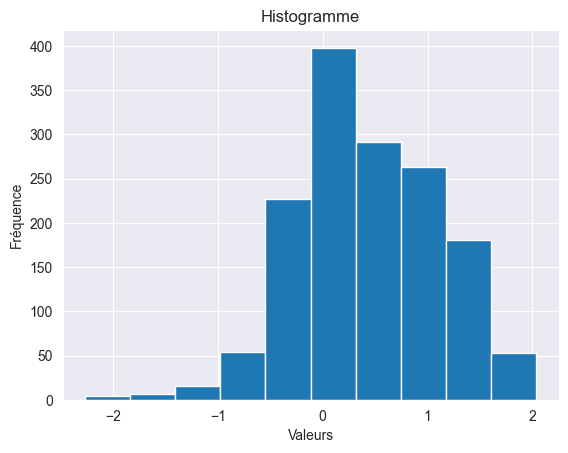

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
Data_X = pd.read_csv('Data_X.csv')

plt.hist(Data_X.loc[:, 'DE_CONSUMPTION'], bins=10)
plt.title('Histogramme')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.show()

Faire un box plot

Text(0.5, 1.0, 'title')

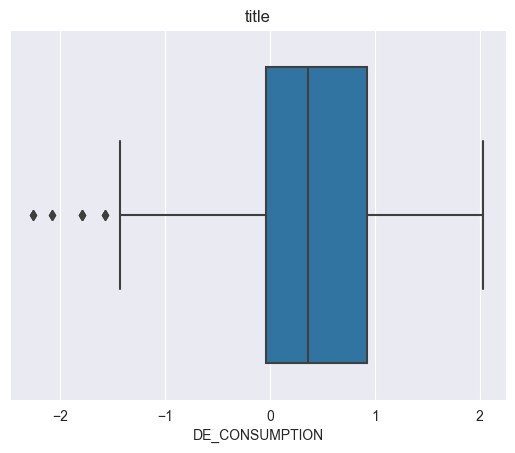

In [6]:
import pandas as pd
import seaborn as sns
Data_X = pd.read_csv('Data_X.csv')
# Tracer un boxplot avec seaborn
sns.boxplot(x=Data_X.loc[:, 'DE_CONSUMPTION'])
plt.title("title")

Faire un scatter plot

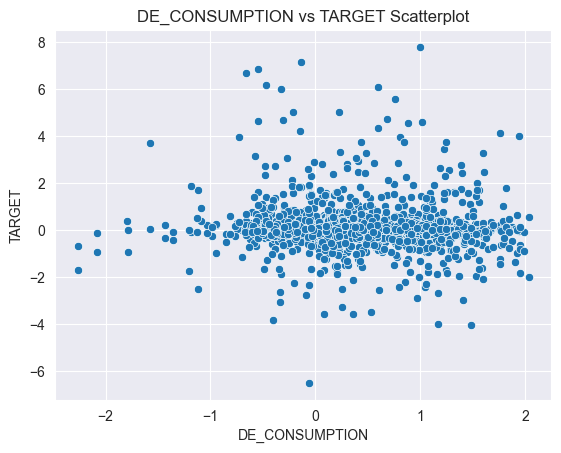

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data_X = pd.read_csv('Data_X.csv')
Data_Y = pd.read_csv('Data_Y.csv')
sns.scatterplot(x=Data_X.loc[:, 'DE_CONSUMPTION'], y=Data_Y.loc[:, 'TARGET'])
plt.title('DE_CONSUMPTION vs TARGET Scatterplot')
plt.savefig('scatter.png')
plt.show()


Regarder la corrélation 

Rappel: La corrélation est une mesure statistique qui évalue la relation linéaire entre deux variables. Elle permet de quantifier la force et la direction de la relation entre deux séries de valeurs.

La corrélation peut prendre des valeurs entre -1 et 1 :

Une corrélation de -1 indique une relation linéaire négative parfaite entre les deux variables: 
si une variable augmente, l'autre variable diminue de manière proportionnelle.

Une corrélation de 0 indique qu'il n'y a pas de relation linéaire entre les deux variables.

Une corrélation de 1 indique une relation linéaire positive parfaite entre les deux variables: 
si une variable augmente, l'autre variable augmente de manière proportionnelle.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data_X = pd.read_csv('Data_X.csv')
Data_Y = pd.read_csv('Data_Y.csv')
print('Correlation between DE_CONSUMPTION and TARGET is : {}'.format(Data_X['DE_WINDPOW'].corr(Data_Y['TARGET'])))

Correlation between DE_CONSUMPTION and TARGET is : -0.15028709949617297


Faire une heatmap de corrélation

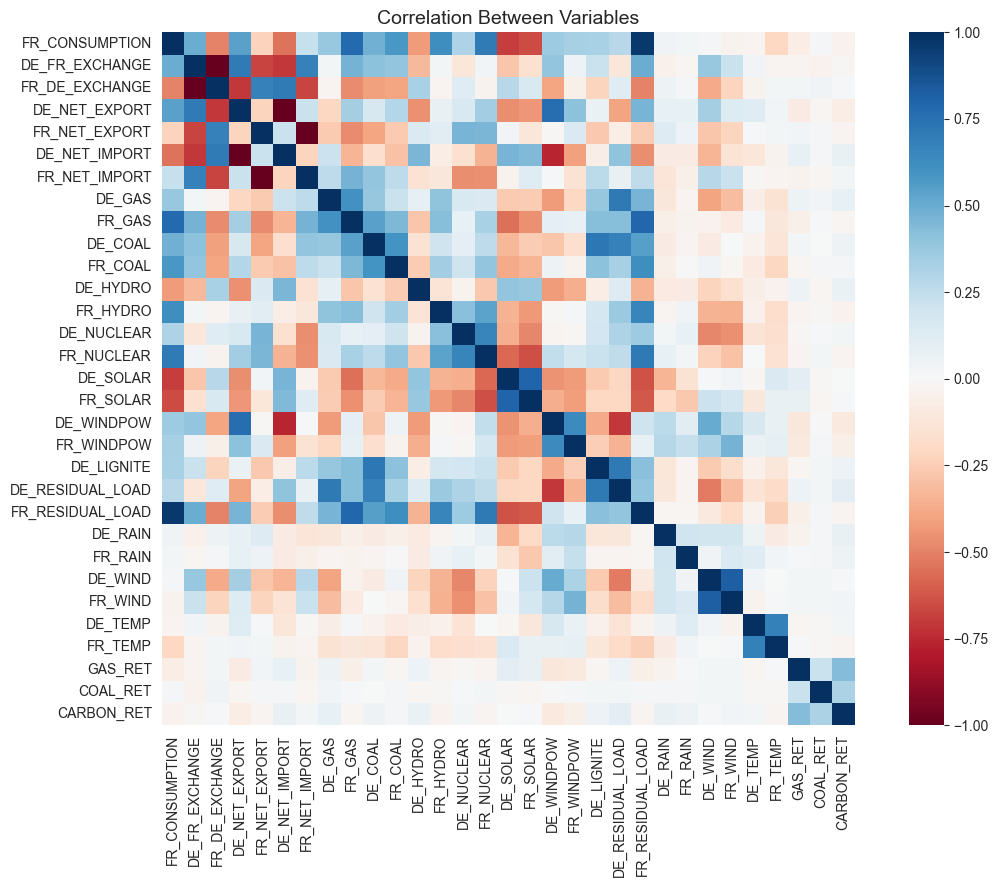

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data_X = pd.read_csv('Data_X.csv')
correlation_metrics=Data_X.iloc[:, 4:].corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=False, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

Faire une heatmap avec 2 tables différentes

218


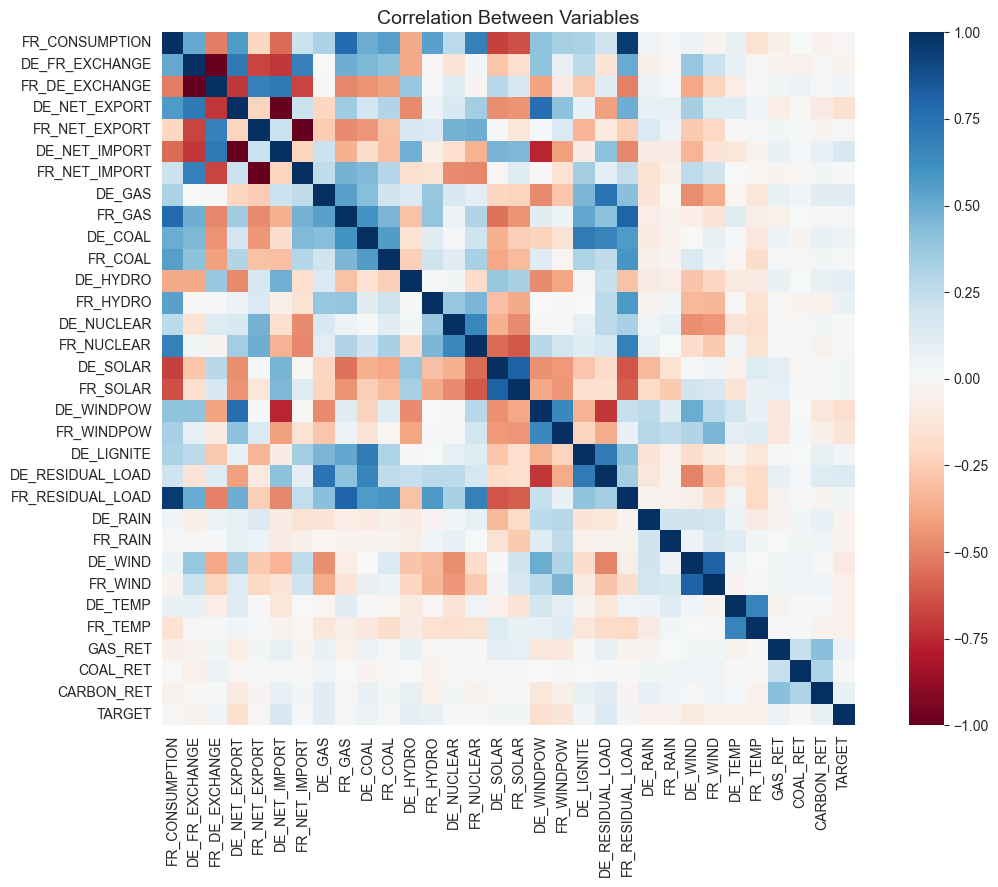

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Data_X = pd.read_csv('Data_X.csv')
Data_Y = pd.read_csv('Data_Y.csv')
missing = Data_X.loc[Data_X.isnull().any(axis=1)].index.tolist()#Donne toutes les lignes qui n'ont pas de valeurs
i=0#variable expliquée plus tard
print(len(missing))
for row in missing:#on parcours la liste
    Data_X=Data_X.drop(Data_X.index[row-i], axis=0)#on supprime les lignes qui n'ont pas de valeurs
    Data_Y=Data_Y.drop(Data_Y.index[row-i], axis=0)#on supprime les lignes qui n'ont pas de valeurs dans Y aussi
    i+=1 #on vérifie qu'il n'y ai pas de décalage dans nos valeurs
missing = Data_X.loc[Data_X.isnull().any(axis=1)].index.tolist()#on vérifie qu'il n'y a plus de valeur vide

correlation_metrics=pd.concat([Data_X.iloc[:, 4:],Data_Y.iloc[:, 1:]], axis=1).corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True, annot=False, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

Trouver les coefficients de régression de la régression linéaire de notre dataset

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Data_X = pd.read_csv('Data_X.csv')
Data_Y = pd.read_csv('Data_Y.csv')
missing = Data_X.loc[Data_X.isnull().any(axis=1)].index.tolist()#Donne toutes les lignes qui n'ont pas de valeurs
i=0#variable expliquée plus tard
for row in missing:#on parcours la liste
    Data_X=Data_X.drop(Data_X.index[row-i], axis=0)#on supprime les lignes qui n'ont pas de valeurs
    Data_Y=Data_Y.drop(Data_Y.index[row-i], axis=0)#on supprime les lignes qui n'ont pas de valeurs dans Y aussi
    i+=1 #on vérifie qu'il n'y ai pas de décalage dans nos valeurs
# Données d'entrée
X = np.array(Data_X.iloc[:, 4:])
y = np.array(Data_Y.loc[:, 'TARGET'])

# Régression linéaire avec SVD
reg = LinearRegression(fit_intercept=False)
reg.fit(X, y)

# Coefficients de la régression
print("Coefficients de régression : ", reg.coef_)

Coefficients de régression :  [ 0.47281943  0.0914213  -0.0914213  -0.10065831 -0.0234219   0.10065831
  0.0234219  -0.03076096  0.06356211 -0.10877252 -0.05430601  0.03857742
  0.03454668 -0.04835549  0.15280412 -0.02611023 -0.07978163  0.01302451
 -0.17799095 -0.14042547  0.23658059 -0.60493585 -0.02624041 -0.02406529
 -0.03854898  0.07062579 -0.03387384  0.00233187  0.02322866 -0.020999
  0.04014679]
